In [112]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_digits


In [113]:
x,y = load_digits(return_X_y=True)
y = y.reshape(-1,1)
x.shape,y.shape

((1797, 64), (1797, 1))

In [114]:

X_random = np.random.randint(0, 16, (180, 64))
Y_random = np.full((180,1),10)
X_random.shape,Y_random.shape


((180, 64), (180, 1))

In [115]:
x = np.concatenate([x, X_random], axis=0)  # محور صفر یعنی ردیف‌ها
y = np.concatenate([y, Y_random], axis=0)  # محور صفر یعنی ردیف‌ها
x.shape,y.shape

((1977, 64), (1977, 1))

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.shape

(1581, 64)

In [117]:
def train(X_train, X_test, y_train, y_test,max_iter=100 , C=1 ,solver='lbfgs',dual=False):
    model = LogisticRegression(max_iter=max_iter , C=C ,solver=solver,dual=dual)
    model.fit(X_train,y_train.ravel())
    s_train = model.score(X_train,y_train)
    s_test = model.score(X_test,y_test)
    return model , f'score_train :{s_train} , score_test : {s_test}'

In [118]:
a = train(X_train, X_test, y_train, y_test, solver='liblinear',max_iter=10000 ,C=1.1)
model= a[0]
a

(LogisticRegression(C=1.1, max_iter=10000, solver='liblinear'),
 'score_train :0.9955724225173941 , score_test : 0.9570707070707071')

In [119]:
def pre(i):
    Y = y_test[i]
    X_p = model.predict(X_test[i].reshape(1,-1))
    plt.figure(figsize=(1,1))
    plt.imshow(X_test[i].reshape(8,8),'gray')
    return f'Y:{Y} -  X_p:{X_p}'

'Y:[9] -  X_p:[9]'

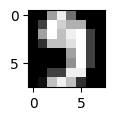

In [120]:
pre(4)